## Task 2: Stock Price Prediction

1. IMPORT LIBRARIES

In [32]:
# 1. IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

- 2. DATA COLLECTION 

In [33]:
# Here we create a synthetic dataset mimicking 1000 days of stock movement
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=1000, freq='B')
close_prices = 100 + np.cumsum(np.random.randn(1000)) # Creating a random walk

df = pd.DataFrame({
    'Date': dates,
    'Close': close_prices
})


In [34]:
# Adding related features (Open, High, Low, Volume) with some noise
df['Open'] = df['Close'].shift(1) + np.random.randn(1000) * 0.5
df['High'] = df[['Open', 'Close']].max(axis=1) + np.random.rand(1000) * 2
df['Low'] = df[['Open', 'Close']].min(axis=1) - np.random.rand(1000) * 2
df['Volume'] = np.random.randint(1000000, 5000000, size=1000)
df.dropna(inplace=True)

3. PREPROCESSING & FEATURE ENGINEERING

In [35]:
# Goal: Predict the "Next Day Close" using "Today's" data
df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace=True) # Last row will have NaN for target



In [36]:
# Select Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Next_Close']

In [37]:
# Time-Series Split: Use first 80% for training, last 20% for testing
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [38]:
# Scaling: Standardize features to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. MODEL TRAINING (Linear Regression)

In [39]:
# 4. MODEL TRAINING (Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


5. EVALUATION

In [40]:
# Predict on test data
predictions = model.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"--- Model Accuracy Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

--- Model Accuracy Metrics ---
Mean Absolute Error (MAE): 0.8145
Root Mean Squared Error (RMSE): 1.0073
R-squared Score: 0.9920


6. VISUALIZATION

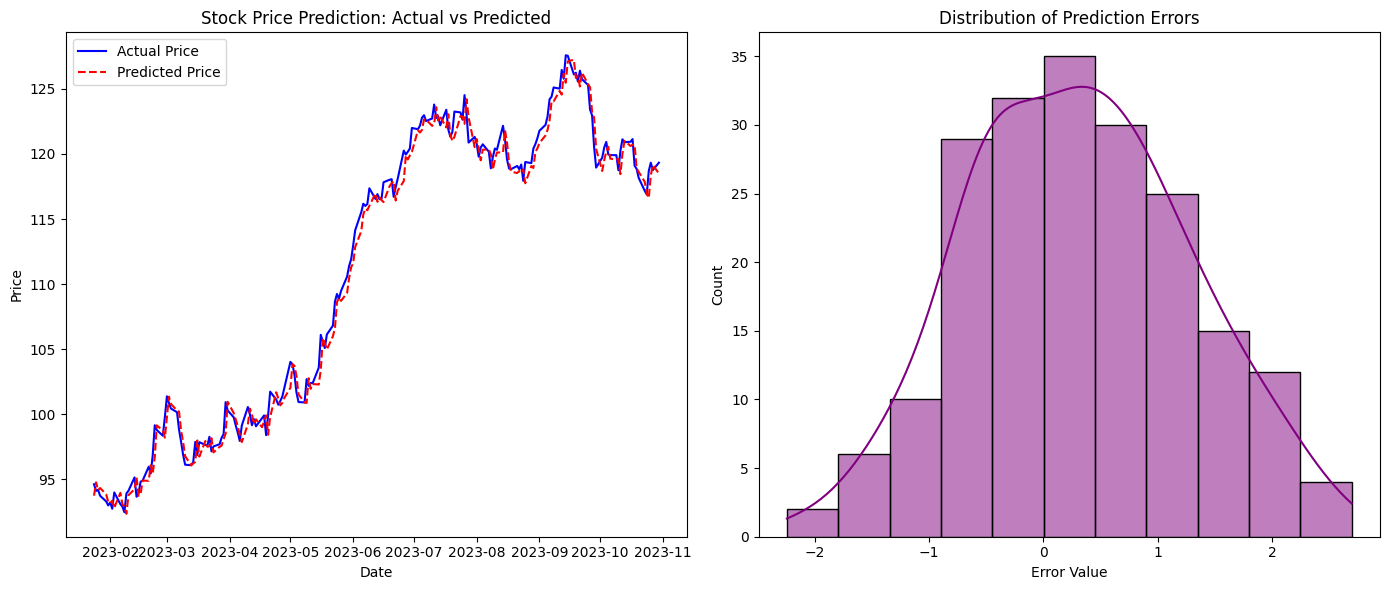

In [41]:
# 6. VISUALIZATION
plt.figure(figsize=(14, 6))

# Plot Actual vs Predicted Prices
plt.subplot(1, 2, 1)
plt.plot(df.iloc[split_idx:]['Date'], y_test, label='Actual Price', color='blue')
plt.plot(df.iloc[split_idx:]['Date'], predictions, label='Predicted Price', color='red', linestyle='--')
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Error Distribution Plot
plt.subplot(1, 2, 2)
sns.histplot(y_test - predictions, kde=True, color='purple')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error Value')

plt.tight_layout()
plt.show()